# Plot the result of experiment

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import toml
import os
import re

def extract_toml_time(file, type, scheme):
  try:
    content = toml.load(file)
    res = {}

    for result in content['perf_result']:
        config = result['config']
        if config['perf_type'] == type and config['fse_type'] == scheme:
            time = result['result']['latency']
            if 'ms' in time:
                time = float(re.sub(r'ms.*', '', time))
            elif 's' in time:
                time = float(re.sub(r's.*', '', time)) * 1000

            column_name = config['attributes'][0]
            if not column_name in res:
                res[column_name] = [time]
            else:
                res[column_name].append(time)

    return res
  except:
    raise Exception("Extract toml time error!")


def analyze_database_performance(name, type, scheme):
    result = []
    path = "../eval/data/"

    for dirname, subdirlist, filelist in os.walk(path):
        for fname in filelist:
            if name in fname:
                print("Scanning {}.".format(fname))
                result.append(extract_toml_time(dirname + '/' + fname, type, scheme))

    return result

Scanning perf_2023-02-09T16:19:52.616562+08:00.toml.
Scanning perf_2023-02-09T16:19:52.616562+08:00.toml.
Scanning perf_2023-02-09T16:19:52.616562+08:00.toml.
Scanning perf_2023-02-09T16:19:52.616562+08:00.toml.
Scanning perf_2023-02-09T16:19:52.616562+08:00.toml.
[{'order_number': [887.759308]}, {'order_number': [2620.9555450000003]}, {'order_number': [2269.065425]}, {'order_number': [2172.185835]}, {'order_number': [2280.2609559999996]}]


/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_87806/256318719.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=14)


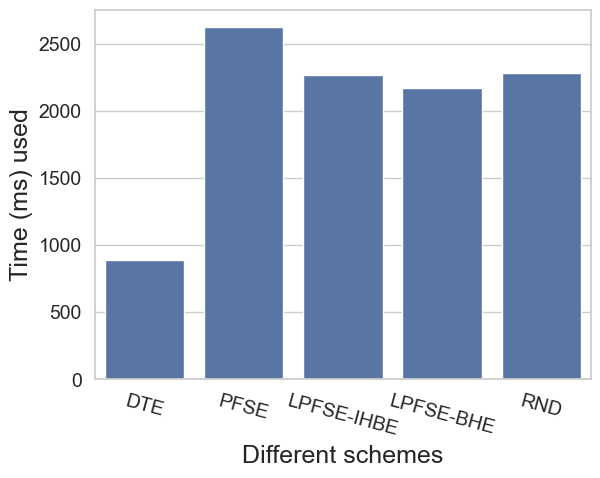

In [6]:
res = []
res += analyze_database_performance("perf_2023-02-09T16:19:52.616562+08:00.toml", 'init', 'dte')
res += analyze_database_performance("perf_2023-02-09T16:19:52.616562+08:00.toml", 'init', 'pfse')
res += analyze_database_performance("perf_2023-02-09T16:19:52.616562+08:00.toml", 'init', 'lpfse_ihbe')
res += analyze_database_performance("perf_2023-02-09T16:19:52.616562+08:00.toml", 'init', 'lpfse_bhe')
res += analyze_database_performance("perf_2023-02-09T16:19:52.616562+08:00.toml", 'init', 'rnd')
print(res)

ys = []
xs =  ['DTE', 'PFSE', 'LPFSE-IHBE', 'LPFSE-BHE', 'RND']
for x in res:
    ys.append(x['order_number'][0])

sns.set(style="whitegrid")
g = sns.barplot(x=xs, y=ys, color='b')
g.set_xlabel('Different schemes', fontsize=18)
g.set_ylabel('Time (ms) used', fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=14, rotation=-15)
g.set_yticklabels(g.get_yticklabels(), size=14)

plt.savefig('./init_order_number.pdf', bbox_inches='tight')


## Micro - Query on `order_number`

Scanning query_f_theta_order_number.toml.
[1.692874, 4.325667, 27.526269, 366.619973, 1.488787, 3.724753, 35.091213, 336.225621, 1.006084, 4.280226, 22.120692, 286.920131, 1.089822, 3.959477, 37.814947, 236.27236]


/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_65570/1170297748.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_65570/1170297748.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


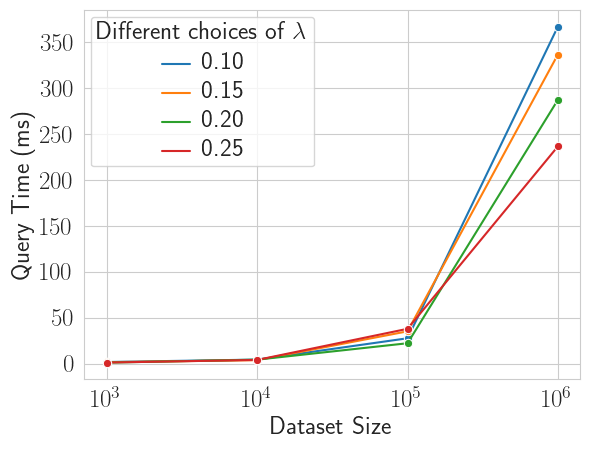

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"
xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('query_f_theta_order_number.toml', 'query', 'pfse')[0]['order_number']
print(ys)

df = pd.DataFrame({
  'Dataset Size': xs,
  '0.10': ys[:4],
  '0.15': ys[4:8],
  '0.20': ys[8:12],
  '0.25': ys[12:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")

g = sns.lineplot(x='Dataset Size', y='Query Time (ms)', hue='Different choices of $\lambda$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Query Time (ms)', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='18') # for legend title

plt.savefig('./query_f_theta_order_number.pdf', bbox_inches='tight')

Scanning insert_f_theta_order_number.toml.
[122.163756, 1344.2185140000001, 11033.658242, 129131.92468299999, 268.377437, 1113.014599, 10096.107397999998, 114446.680036, 280.614887, 944.379688, 7573.464757, 74833.519537, 217.949476, 623.453815, 6593.535946, 71084.39627200001]


/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_65570/3592044956.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=18)
/var/folders/ch/7qnxq4517nb4kbts86m0s1mc0000gn/T/ipykernel_65570/3592044956.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size=18)


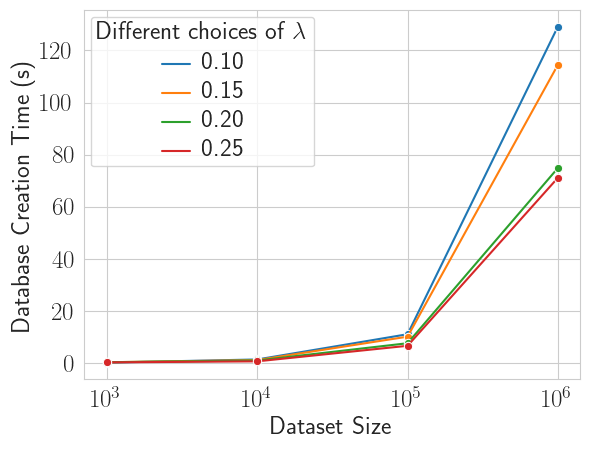

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xs = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']
ys = analyze_database_performance('insert_f_theta_order_number.toml', 'insert', 'pfse')[0]['order_number']
print(ys)
ys = [x / 1000 for x in ys]

df = pd.DataFrame({
  'Dataset Size': xs,
  '0.10': ys[:4],
  '0.15': ys[4:8],
  '0.20': ys[8:12],
  '0.25': ys[12:],
})

plt.rc('text', usetex=True)
sns.set_style("whitegrid")
g = sns.lineplot(x='Dataset Size', y='Database Creation Time (s)', hue='Different choices of $\lambda$', 
                 data=pd.melt(df, id_vars=['Dataset Size'], value_name='Database Creation Time (s)', var_name='Different choices of $\lambda$'),
                 marker='o')
g.set_xlabel(g.get_xlabel(), fontsize=18)
g.set_ylabel(g.get_ylabel(), fontsize=18)
g.set_xticklabels(g.get_xticklabels(), size=18)
g.set_yticklabels(g.get_yticklabels(), size=18)
plt.setp(g.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='18') # for legend title

plt.savefig('./insert_f_theta_order_number.pdf', bbox_inches='tight')